In [107]:
from datetime import datetime
import matplotlib.pyplot as plt
import meteostat
from meteostat import Stations, Daily

In [108]:
seattle = meteostat.Point(47.6, -122.3)

In [109]:
# Import Meteostat library
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(47.6, -122.3)
station = stations.fetch(3)
# Print DataFrame
station = station.iloc[[1]]
print(station)


         name country region   wmo  icao  latitude  longitude  elevation   
id                                                                         
KRNT0  Renton      US     WA  <NA>  KRNT   47.4931  -122.2157       10.0  \

                  timezone hourly_start hourly_end daily_start  daily_end   
id                                                                          
KRNT0  America/Los_Angeles   2006-01-01 2023-05-09  2006-01-01 2022-04-24  \

      monthly_start monthly_end      distance  
id                                             
KRNT0    2006-01-01  2021-01-01  13465.798988  


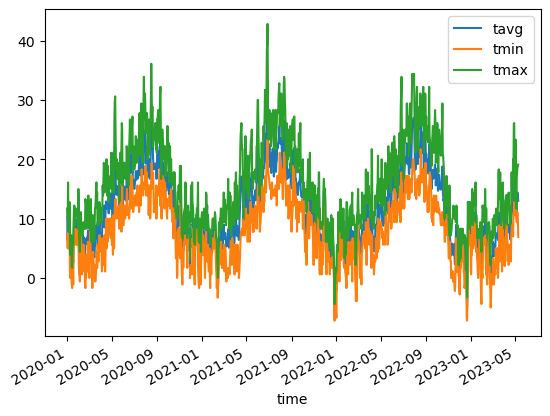

In [110]:
start = datetime(2020, 1, 1)
end = datetime(2023, 5, 10)

data = Daily(loc=station, start=start, end=end)
df = data.fetch()
df.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1220 entries, 2020-01-01 to 2023-05-10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    1218 non-null   float64
 1   tmin    1218 non-null   float64
 2   tmax    1218 non-null   float64
 3   prcp    1022 non-null   float64
 4   snow    0 non-null      float64
 5   wdir    1063 non-null   float64
 6   wspd    1212 non-null   float64
 7   wpgt    0 non-null      float64
 8   pres    1111 non-null   float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 104.8 KB


<AxesSubplot:xlabel='time'>

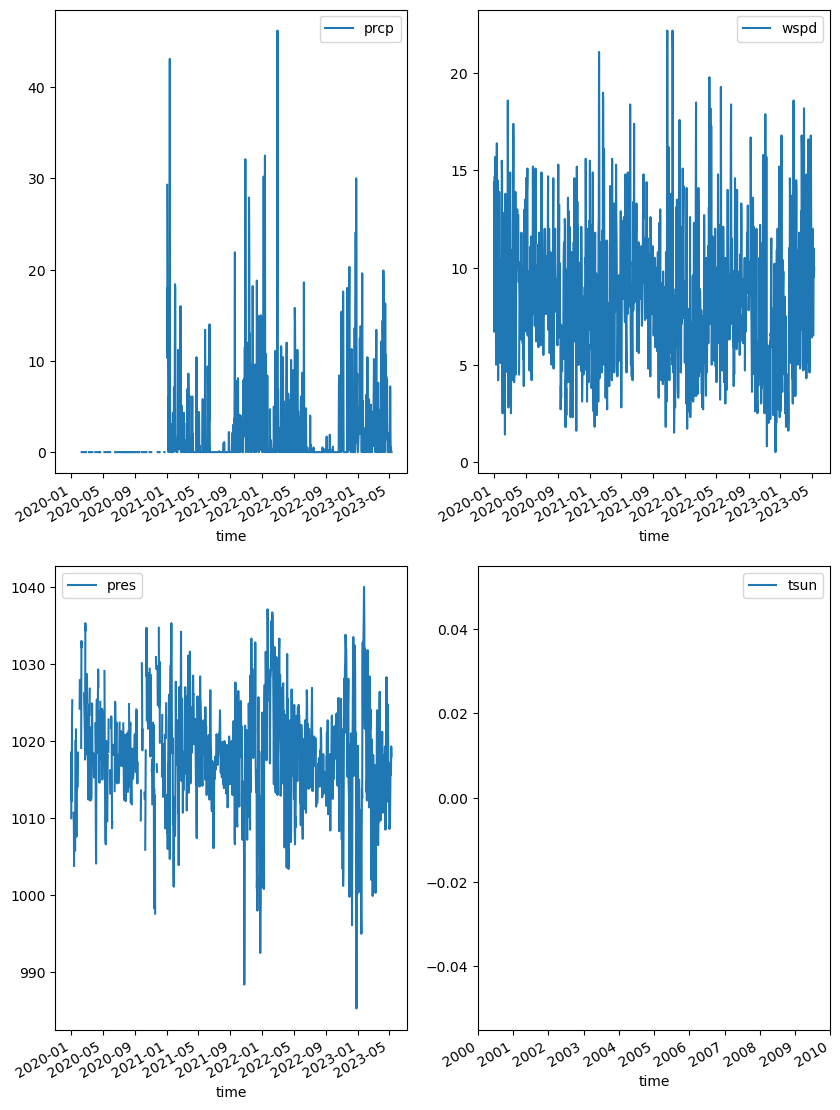

In [112]:
# We need to make sure that we have sunlight

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))
df['prcp'].plot(ax=ax[0][0], legend=True)
df['wspd'].plot(ax=ax[0][1], legend=True)
df['pres'].plot(ax=ax[1][0], legend=True)
df['tsun'].plot(ax=ax[1][1], legend=True)